{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Chapter Two - Fundamentals of Vector Data in Python 

In this chapter, you will learn fundamental concepts related to working with raster data in **Python**, including understanding the spatial attributes of raster data, how to open raster data and access its metadata, and how to explore the distribution of values in a raster dataset. 


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this chapter, you will be able to:

* Describe the characteristics of 3 key vector data structures: points, lines and polygons.
* Open a shapefile in **Python** using **geopandas** - `gpd.read_file()`.
* View the CRS and other spatial metadata of a vector spatial layer in **Python**
* Access and view the attributes of a vector spatial layer in **Python**.


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You will need a computer with internet access to complete this lesson and the
spatial-vector-lidar data subset created for the course.

{% include/data_subsets/course_earth_analytics/_data-spatial-lidar.md %}

</div>


## About Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices determines the type of vector that you are working 
with. There are three types of vector data: 

* **Points:** Each individual point is defined by a single x, y coordinate. There can be many points in a vector point file. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. Occasionally, a polygon can have a hole in the middle of it (like a doughnut), this is something to be aware of but not an issue you will deal with in this tutorial.


<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png" alt="There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>


<i class="fa fa-star"></i> **Data Tip:** Sometimes, boundary layers such as states and countries, are stored as lines rather than polygons. However, these boundaries, when represented as a line, will not create a closed object with a defined "area" that can be "filled".
{: .notice--warning }


## Shapefiles: Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` format. Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines 
or all polygons). You will not find a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated `attributes` that describe the data. For example, a line shapefile that contains the locations of streams, might contain the associated stream name, stream "order" and other 
information about each stream line object.

* More about shapefiles can found on <a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.


## One Dataset - Many Files

A text file is often self contained. For example, one `.csv` file is composed of one unique file. Many spatial formats are composed of several files. A shapefile is created by 3 or more files, all of which must retain the same NAME and be
stored in the same file directory, in order for you to be able to work with them.

### Shapefile Structure

There are 3 key files associated with any and all shapefiles:

* **`.shp`:** the file that contains the geometry for all features.
* **`.shx`:** the file that indexes the geometry.
* **`.dbf`:** the file that stores feature attributes in a tabular format.

These files need to have the **same name** and to be stored in the same directory (folder) to open properly in a GIS, `R` or **Python** tool.

Sometimes, a shapefile will have other associated files including:

* `.prj`: the file that contains information on projection format including
the coordinate system and projection information. It is a plain text file
describing the projection using well-known text (WKT) format.
* `.sbn` and `.sbx`: the files that are a spatial index of the features.
* `.shp.xml`: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

## Data Management - Sharing Shapefiles

When you work with a shapefile, you must keep all of the key associated file types together. And when you share a shapefile with a colleague, it is important to zip up all of these files into one package before you send it to
them!

## Import Shapefiles

You will use the **geopandas** library to work with vector data in **Python**. You will also use `matplotlib.pyplot` to plot your data. 

In [1]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# Get data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

The shapefiles that you will import are:

* A polygon shapefile representing our field site boundary,
* A line shapefile representing roads, and
* A point shapefile representing the location of field sites at the <a href="http://www.neonscience.org/science-design/field-sites/harvard-forest" target="_blank"> San Joachin field site</a>.

The first shapefile that you will open contains the point locations of plots where trees have been measured. To import shapefiles you use the `geopandas` function `read_file()`. Notice that you call the `read_file()` function using `gpd.read_file()` to tell python to look for the function within the `geopandas` library.


In [2]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)


## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it. These attributes can include different types
of information that describe objects stored within a shapefile. Thus, our road,
may have a name, length, number of lanes, speed limit, type of road and other
attributes stored with it.


<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/spatial-attribute-tables.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/spatial-attribute-tables.png" alt="A shapefile has an associated attribute table. Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate .dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object. Image Source: National Ecological Observatory Network (NEON)"></a>
    <figcaption>Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


You can view the attribute table associated with our geopandas `GeoDataFrame` by simply typing the object name into the console (e.g., `sjer_plot_locations`). 

Or you can use the `.head(3)` function to only display the first 3 rows of the attribute table. The number in the `.head()` function represents the total number of rows that will be returned by the function. 

In [3]:
# View top 6 rows of attribute table
sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [4]:
# View the geometry type of each row
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In this case, you have several attributes associated with our points including:

* Plot_ID, Point, easting, geometry, northing, plot_type 

<i class="fa fa-star"></i> **Data Tip:** The acronym, OGR, refers to the OpenGIS Simple Features Reference Implementation. <a href="https://trac.osgeo.org/gdal/wiki/FAQGeneral" target="_blank"> Learn more about OGR.</a>
{: .notice--warning }


### The Geopandas Data Structure

Notice that the geopandas data structure is a `dataframe` that contains a `geometry` column where the x, y point location values are stored. All of the other shapefile feature attributes are contained in columns, similar to what you may be used to if you've used a GIS tool such as ArcGIS or QGIS.

## Shapefile Metadata & Attributes

When you import the `SJER_plot_centroids` shapefile layer into `Python` the `gpd.read_file()` function automatically stores information about the data as attributes. You are particularly interested in the geospatial **metadata**, describing the format, `CRS`, `extent`, and other components of the vector data, and the **attributes** which describe properties associated with each individual vector object.


## Spatial Metadata

Key metadata for all shapefiles include:

1. **Object Type:** the class of the imported object.
2. **Coordinate Reference System (CRS):** the projection of the data.
3. **Extent:** the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile.

You can view these shapefile metadata using the `.crs` and `.total_bounds` attributes:

In [5]:
# View object type
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [6]:
# View CRS of object
sjer_plot_locations.crs

{'init': 'epsg:32611'}

The CRS for the data is epsg code: `32611`. You will learn about CRS formats and structures in a later lesson but for now a quick google search reveals that this CRS is: <a href="http://spatialreference.org/ref/epsg/wgs-84-utm-zone-11n/" target="_blank">UTM zone 11 North - WGS84</a>.

In [7]:
# View the spatial extent
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/spatial-extent.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/spatial-extent.png" alt="The spatial extent of a shapefile or geopandas GeoDataFrame represents the geographic edge or location that is the furthest north, south east and west. Thus is represents the overall geographic coverage of the spatial object. Image Source: National Ecological Observatory Network (NEON)."></a>
    <figcaption>The spatial extent of a shapefile or geopandas GeoDataFrame represents
    the geographic "edge" or location that is the furthest north, south east and
    west. Thus is represents the overall geographic coverage of the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>

## How Many Features Are In Your Shapefile? 

You can view the number of features (counted by the number of rows in the attribute table) and feature attributes (number of columns) in our data using the pandas `.shape` method. Note that the data are returned as a vector of two values:

(rows, columns) 

Also note that the number of columns includes a column where the geometry (the x, y coordinate locations) are stored. 

In [8]:
sjer_plot_locations.shape

(18, 6)

## Loop Through Metadata 
You can loop through several of the metadata elements too. Below you investigate the **coordinate reference system** (`crs`) and the spatial **extent** of your shapefile.

In [9]:
# for attr in ['crs', 'total_bounds']:
#     print(attr, '\n', getattr(sjer_plot_locations.head(), attr))

In [10]:
# nice additional resource to add?
#https://geohackweek.github.io/vector/04-geopandas-intro/

# Plot a Shapefile

Next, you can visualize the data in your **Python** `geodataframe` object using the `.plot()` method. Notice that you can create a plot using the geopandas base plotting using the syntax:

`dataframe_name.plot()`

You can call .plot() without setting up a figure and axis object like this: 

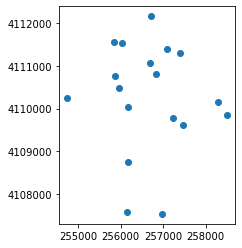

In [11]:
sjer_plot_locations.plot()

However in general it is good practice to setup an axis object so you can plot different layers together. When you do that you need to provide the plot function with the axis object that you want it to plot on.
Below, you define the axis as `ax`, here:

`fig, ax = plt.subplots(figsize = (10,10))`

You then plot the data and provide the `ax=` argument with the ax object.

`sjer_plot_locations.plot(ax=ax)`

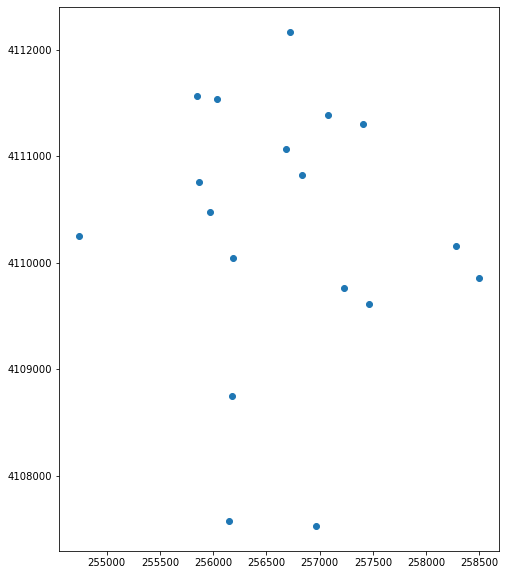

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data using geopandas .plot() method
sjer_plot_locations.plot(ax=ax)

plt.show()

Note that you can name that axis whatever you'd like. Below it is called `ax1` instead of `ax`.

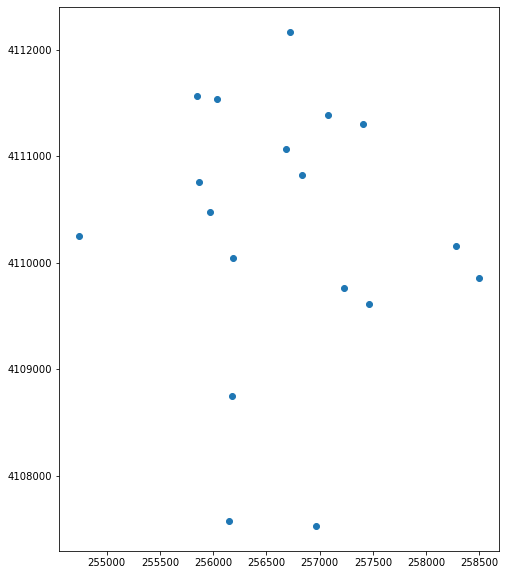

In [13]:
fig, ax1 = plt.subplots(figsize = (10,10))

# Plot the data using geopandas .plot() method
sjer_plot_locations.plot(ax=ax1)

plt.show()

You can plot the data by feature attribute and add a legend too. Below you add the following plot arguments to your geopandas plot:

* **column:** the attribute column that you want to plot your data using
* **categorical=True:** set the plot to plot categorical data - in this case plot types. 
* **legend:** add a legend
* **markersize:** increase or decrease the size of the points or markers rendered on the plot
* **cmap:** set the colors used to plot the data
* **title** add a title to your plot.

and fig size if you want to specify the size of the output plot. 

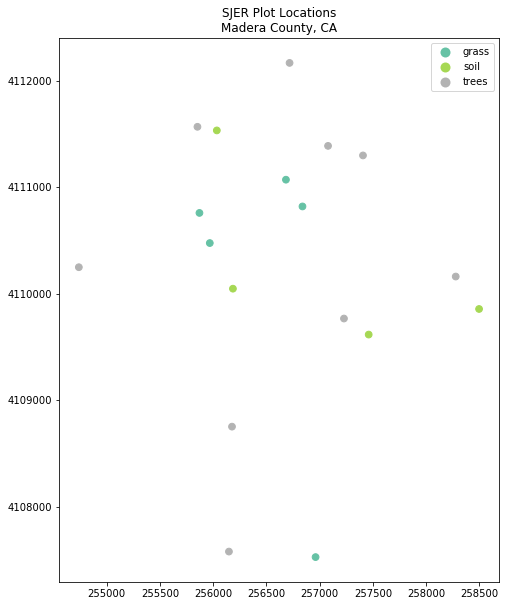

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)
# Add a title
ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

### Change Plot Colors & Symbols

You can use the cmap argument to adjust the colors of our plot. Below you used a colormap that is a part of the <a href="http://matplotlib.org/users/colormaps.html" target="_blank">matplotlib colormap library.</a>

Finally you use the **marker=** argument to specify the marker style.

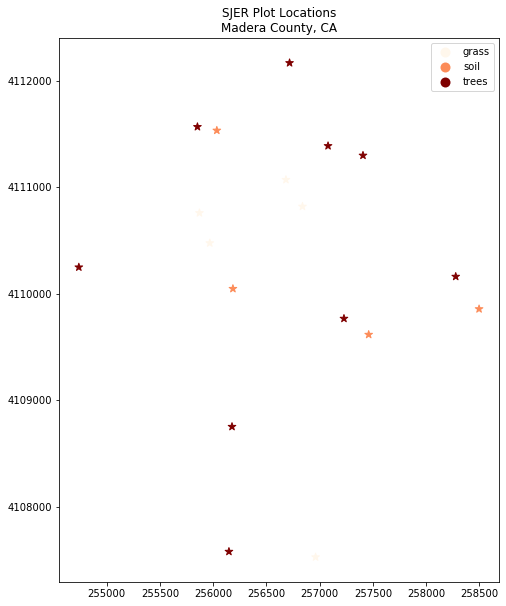

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=65,
                         cmap='OrRd', 
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

In [16]:
## answers
# this should be hidden
# sjer_crop_extent.crs
## {'init': 'epsg:32611'}

## NOTE that this is the answer to the challenge and thus needs to be hidden. 

# 1. type(sjer_roads) - geopandas.geodataframe.GeoDataFrame
# 2. SJER_roads: 4269, crop_extent 32611
# 3. sjer_roads contains only lines and sjer_plot_locations contains points

# 4 -> numerous ways to find this; sjer_roads=13,
# length(sjer_roads)  #easiest, but not previously taught
# sjer_roads  #look at 'features'
# attributes(sjer_roads)  #found in the $data section as above


# sjer_roads = gpd.read_file(op.join(path_data, 'california', 'madera-county-roads', 'tl_2013_06039_roads.shp'))
#sjer_roads = gpd.read_file("data/week5/california/madera-county-roads/tl_2013_06039_roads.shp")
#sjer_crop_extent = gpd.read_file(op.join(path_data, 'california', 'SJER', 'vector_data', 'SJER_crop.shp'))
#sjer_crop_extent = gpd.read_file("data/week5/california/SJER/vector_data/SJER_crop.shp")

## the answers...

#sjer_roads.crs
#sjer_roads.total_bounds
#sjer_roads.geom_type
#sjer_crop_extent.crs
#sjer_crop_extent.total_bounds
#sjer_crop_extent.geom_type

## Plot Multiple Shapefiles Together With Geopandas

You can plot several layers on top of each other using the geopandas `.plot` method. To do this, you:

1. Define the `ax` variable just as you did above to add a title to our plot. 
2. Then you add as many layers to the plot as you want using geopandas `.plot()` method.

Notice below 

`ax.set_axis_off()` is used to turn off the x and y axis and 

`plt.axis('equal')` is used to ensure the x and y axis are uniformly spaced. 


In [17]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

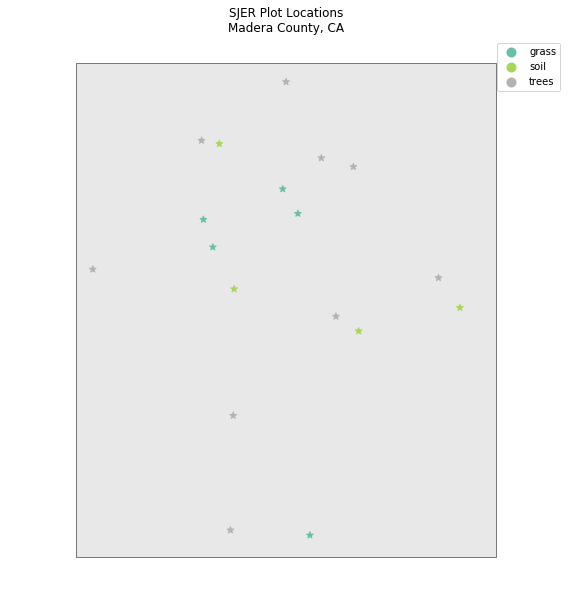

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()